EDA of Yield for Cucumber and Tomato

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
def load_and_melt(path, crop_name):
    df = pd.read_csv(path)
    for col in df.columns[1:]:
        df[col] = pd.to_numeric(df[col], errors='coerce') * 0.1
    df_melt = df.melt(
        id_vars=df.columns[0],
        var_name='Year',
        value_name='Yield'
    )
    df_melt.rename(columns={df.columns[0]: 'Region'}, inplace=True)
    df_melt['Crop'] = crop_name
    return df_melt

paths = {
    'Tomato': '/Users/rashidkarimov/Desktop/agro/data/processed/cleaned/statistics_committee/tomato_yield.csv',
    'Cucumber': '/Users/rashidkarimov/Desktop/agro/data/processed/cleaned/statistics_committee/cucumber_yield.csv',
    'Onion': '/Users/rashidkarimov/Desktop/agro/data/processed/cleaned/statistics_committee/onion_yield.csv',
    'Potato': '/Users/rashidkarimov/Desktop/agro/data/processed/cleaned/statistics_committee/potato_yield.csv'
}

df_list = []
for crop, p in paths.items():
    df_list.append(load_and_melt(p, crop))
df_all = pd.concat(df_list, ignore_index=True)
df_all['Year'] = pd.to_numeric(df_all['Year'], errors='coerce')
df_all.dropna(subset=['Year', 'Yield'], inplace=True)
df_all.head()


,Region,Year,Yield,Crop
0,Republic of Azerbaijan,2000,17.9,Tomato
1,Baku city,2000,12.7,Tomato
2,Nakhchivan Autonomous Republic,2000,9.3,Tomato
4,Babak district,2000,9.2,Tomato
5,Julfa district,2000,14.1,Tomato


In [22]:
df_all.info()
df_all.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 7312 entries, 0 to 8351
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Region  7312 non-null   object 
 1   Year    7312 non-null   int64  
 2   Yield   7312 non-null   float64
 3   Crop    7312 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 285.6+ KB


,Year,Yield
count,7312.000000,7312.000000
mean,2012.038293,12.457159
std,6.844016,6.753867
min,2000.000000,0.040000
25%,2006.000000,8.400000
50%,2012.000000,10.835000
75%,2018.000000,15.200000
max,2023.000000,79.800000


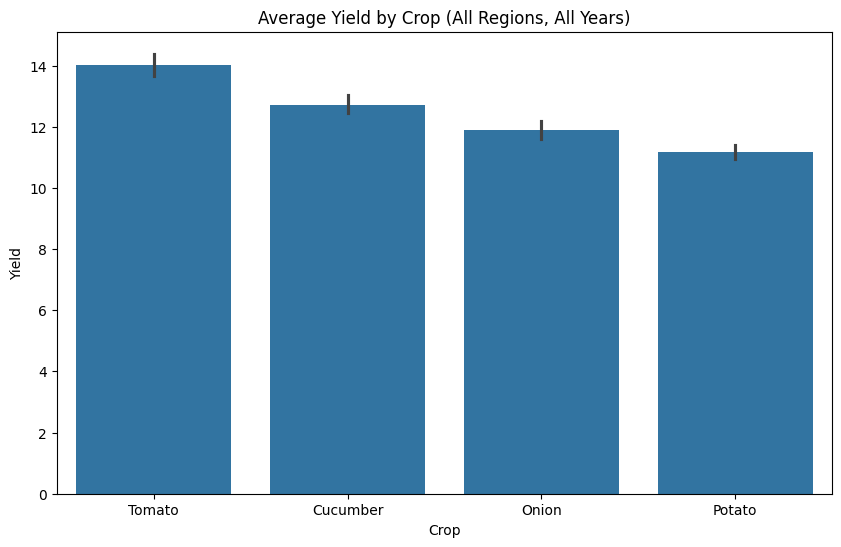

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_all, x='Crop', y='Yield')
plt.title('Average Yield by Crop (All Regions, All Years)')
plt.show()


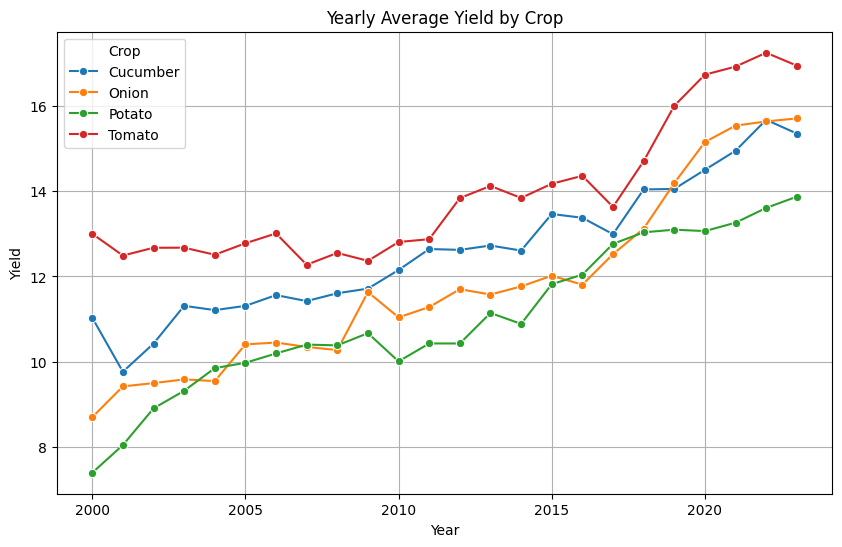

In [24]:
grouped = df_all.groupby(['Year','Crop'])['Yield'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=grouped, x='Year', y='Yield', hue='Crop', marker='o')
plt.title('Yearly Average Yield by Crop')
plt.grid(True)
plt.show()


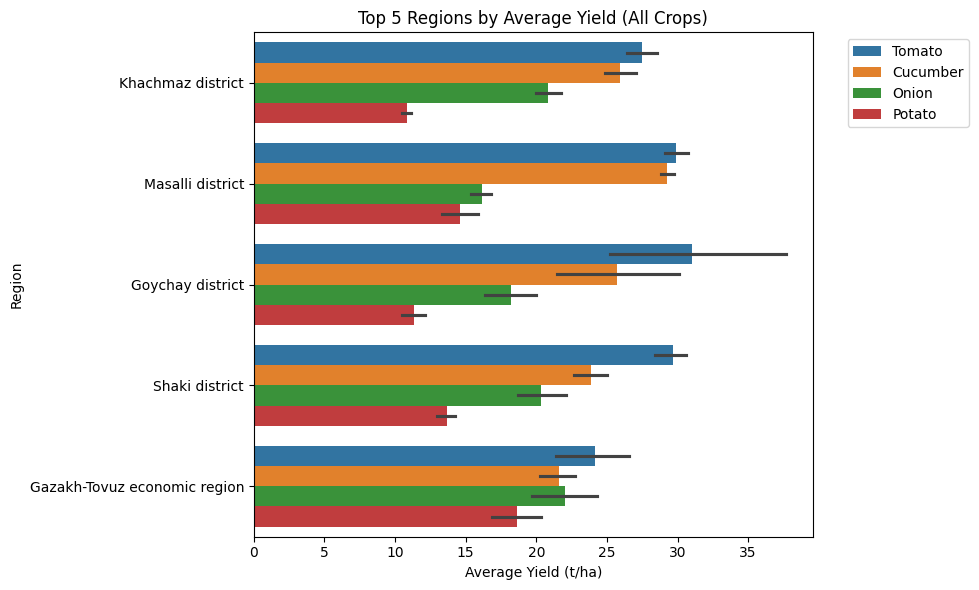

In [30]:
# Identify top 5 regions by overall average yield (across all crops and years)
top_5_regions = (df_all.groupby('Region')['Yield']
                       .mean()
                       .nlargest(5)
                       .index)

# Filter to only those top 5 regions
df_top5 = df_all[df_all['Region'].isin(top_5_regions)]

# Barplot of average yield per region & crop (top 5 regions)
plt.figure(figsize=(10,6))
sns.barplot(data=df_top5, x='Yield', y='Region', hue='Crop', estimator=np.mean)
plt.title('Top 5 Regions by Average Yield (All Crops)')
plt.xlabel('Average Yield (t/ha)')
plt.ylabel('Region')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


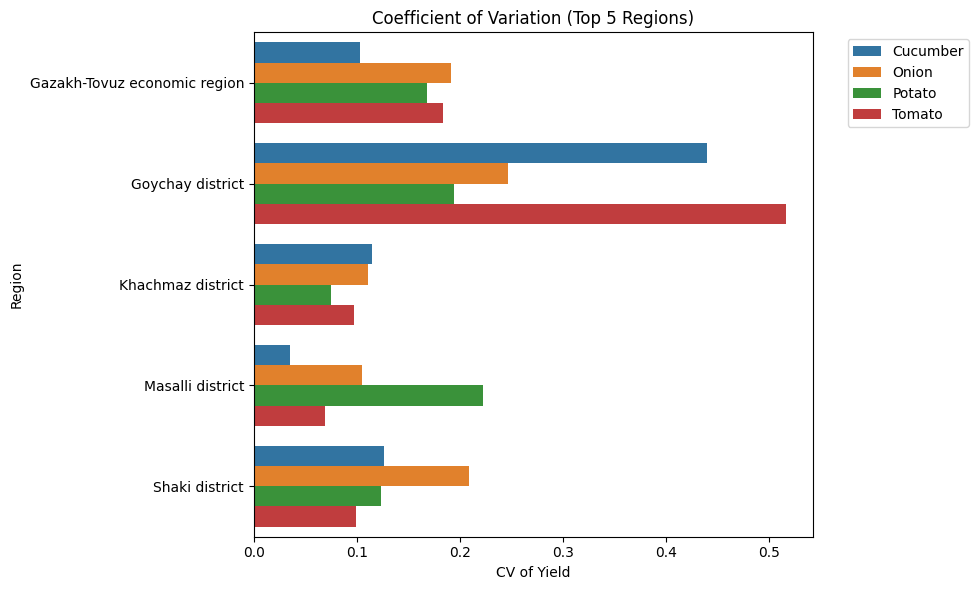

In [31]:
# Coefficient of Variation for top 5 regions
stats_top5 = df_top5.groupby(['Region','Crop'])['Yield'].agg(['mean','std']).reset_index()
stats_top5['CV'] = stats_top5['std'] / stats_top5['mean']

plt.figure(figsize=(10,6))
sns.barplot(data=stats_top5, x='CV', y='Region', hue='Crop')
plt.title('Coefficient of Variation (Top 5 Regions)')
plt.xlabel('CV of Yield')
plt.ylabel('Region')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
df_yield_filtered = df_all[df_all['Region'] != "Republic of Azerbaijan"]

region_yield = df_yield_filtered.groupby(['Crop', 'Region'])['Yield'].mean().reset_index()

highest_yield_regions = region_yield.loc[region_yield.groupby('Crop')['Yield'].idxmax()]

print("Regions with highest average yield for each crop (excluding 'Republic of Azerbaijan'):")
print(highest_yield_regions)


Regions with highest average yield for each crop (excluding 'Republic of Azerbaijan'):
         Crop                          Region      Yield
50   Cucumber                Masalli district  29.283889
123     Onion        Karabakh economic region  24.438182
246    Potato                  Tovuz district  23.890417
326    Tomato  Shirvan-Salyan economic region  33.008182
